<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/04%20Deep%20Learning/notebooks/07-Embeddings-NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embeddings

Una incrustación (embedding) es un mapeo de una variable discreta -categórica- a un vector de números continuos. En el contexto de las redes neuronales, las incrustaciones son representaciones vectoriales continuas aprendidas de baja dimensionalidad de variables discretas. Las incrustaciones de redes neuronales son útiles porque pueden reducir la dimensionalidad de las variables categóricas y representar de forma significativa los objetos en el espacio transformado.

Las incrustaciones de redes neuronales tienen 3 objetivos principales:

* Encontrar los vecinos más cercanos en el espacio de incrustación. Pueden utilizarse para hacer recomendaciones basadas en los intereses del usuario o en categorías de clúster.
* Como entrada a un modelo de aprendizaje automático para una tarea supervisada.
* Para visualizar conceptos y relaciones entre categorías.

<h1>Embeddings para NLP</h1>

En esta notebook exploraremos los embeddings de palabras o documentos, también analizaremos algunos de sus aplicaciones. Usaremos los embeddings como features para un problema de análisis de sentimientos.

Nos concentraremos en uno de los métodos *tradicionales* de embeddings  `word2vec`.

https://projector.tensorflow.org/

#Introducción

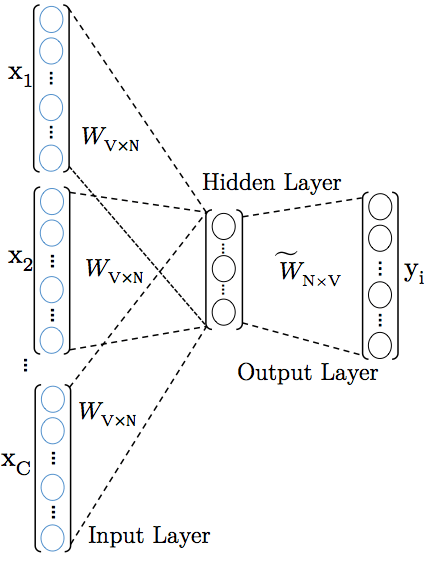

Word2vec es un modelo que asocia representaciones vectoriales a cada palabra en un corpus. Esta asociación se hace entrenando una red neuronal superficial en la tarea de predecir una palabra dado un contexto. La matriz de pesos resultante del entrenamiento contiene representaciones vectoriales aprendidas por la red, es decir, es la codificación que la red ha hecho de cada palabra. **Este es el principio general de los embeddings, son representaciones vectoriales densas de las features vistas por la red durante el entrenamiento.**

Como resultado de este entrenamiento, palabras ocurriendo en contextos similares tienen vectores cercanos. Que dos palabras ocurran en contextos similares se ilustra en este ejemplo:

* La niña juega con la **pelota**
* La niña juega con la **patineta**

En este caso, las palabras *pelota* y *patineta* ocurren en contextos similares y por lo tanto, tendrán vectores similares. Esto es equivalente a la hipótesis de la semántica distributiva, que también puede enunciarse como *se le conoce a una palabra por la compañía que mantiene*.

Se ha demostrado empíricamente que los patrones semánticos y sintácticos pueden reproducirse utilizando la aritmética vectorial. Patrones como *Hombre es a Mujer como Hermano es a Hermana* pueden ser generados a través de operaciones algebraicas en las representaciones vectoriales de estas palabras de tal manera que el vector

$$v_\text{Hermano} - v_\text{Hombre} + v_\text{Mujer}$$

es el más cercano a la representación vectorial de "Hermana" en el modelo.

Frecuentemente, los embeddings tienen regularidades geométricas representando fenómenos propios del problema que se esta modelando.

Al hablar de *embeddings*, la métrica usada suele ser la métrica angular, o la similitud coseno. Esto, a diferencia de la métrica euclidiana.

# Otros modelos de lenguaje (usando embeddings)

* FastText
* Glove
* Doc2vec
* ELMO
* BERT

In [ ]:
#@title Bajamos los datos de nltk
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#@title Función para limpiar el texto
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def clean(text):
    clean_text = re.sub(CLEANR, '', text.lower()) # Quitamos etiquetas HTML
    clean_text = re.sub(r'[^\w\s]', '', clean_text.lower()) # Quitamos signos de puntuación y símbolos
    clean_text = re.sub('[0-9]', '', clean_text.lower())  # Quitamos números
    SW = stopwords.words('english') # Leemos la lista de stopwords del inglés
    tokens_no_sw = [word for word in word_tokenize(clean_text) if not word in SW] # Quitamos stopwords
    stems = []
    for w in tokens_no_sw:
        stems.append(lemmatizer.lemmatize(w))
    return stems

# Modelos pre-entrenados

Se pueden descargar modelos pre-entrenados en corpus muy grandes. Una manera de hacerlo es usando los modelos de `gensim`. La manera de hacerlo es la siguiente:

In [ ]:
import gensim.downloader

Veamos los modelos disponibles

In [ ]:
for x in gensim.downloader.info()['models'].keys():
    print(x)

fasttext-wiki-news-subwords-300
conceptnet-numberbatch-17-06-300
word2vec-ruscorpora-300
word2vec-google-news-300
glove-wiki-gigaword-50
glove-wiki-gigaword-100
glove-wiki-gigaword-200
glove-wiki-gigaword-300
glove-twitter-25
glove-twitter-50
glove-twitter-100
glove-twitter-200
__testing_word2vec-matrix-synopsis


Descarguemos uno, pueden ser archivos grandes. Este tarda alrededor de 10 minutos.

In [ ]:
w2v = gensim.downloader.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


Este es más pequeño, tarda alrededor de 3 minutos en descargarse.

In [ ]:
kv = gensim.downloader.load('glove-twitter-100')

[=================================================-] 98.5% 381.4/387.1MB downloaded


También podemos buscar estos modelos en diversos sitios, por ejemplo:

* https://github.com/RaRe-Technologies/gensim-data

## Algunas tareas que se pueden hacer

Podemos encontrar las palabras semánticamente más similares a una palabra dada.

In [ ]:
kv.most_similar('good')

[('great', 0.8995507955551147),
 ('well', 0.8844853043556213),
 ('better', 0.8784540891647339),
 ('nice', 0.8719304203987122),
 ('too', 0.850609302520752),
 ('night', 0.8455638885498047),
 ('way', 0.8432667851448059),
 ('but', 0.8425140380859375),
 ('it', 0.8408531546592712),
 ('morning', 0.8380196690559387)]

Podemos obtener el embedding de una palabra concreta

In [ ]:
kv.get_vector('man')

array([ 0.44699  , -0.10846  , -0.3797   ,  0.091906 , -0.49038  ,
        0.60179  ,  0.0056179,  0.74629  ,  0.66478  ,  0.065319 ,
        0.16921  ,  0.58992  , -4.2407   , -0.0271   ,  0.40518  ,
       -0.0076202,  0.92023  , -0.45819  , -0.034881 , -0.30659  ,
        0.05422  ,  0.74396  ,  0.25329  ,  0.078992 , -0.2678   ,
       -0.82182  , -0.26234  , -0.31675  , -1.3842   , -0.80196  ,
        0.021631 ,  0.42501  , -0.24073  , -0.29752  ,  0.81814  ,
        0.69792  , -0.080286 ,  0.19901  , -0.3429   , -0.15615  ,
       -1.9456   ,  0.39166  , -0.17509  ,  0.18322  ,  0.072098 ,
       -0.0052181,  0.30362  ,  0.98273  ,  0.13574  ,  0.47985  ,
       -0.71209  ,  0.41966  ,  0.41384  ,  0.1137   , -0.534    ,
       -0.57089  , -0.13469  ,  0.43792  , -0.86947  ,  0.21999  ,
       -0.22048  , -0.12789  ,  0.10097  , -0.38393  ,  0.018573 ,
       -0.17419  ,  0.30518  ,  0.17857  , -0.64789  ,  0.25267  ,
        0.11857  , -0.47142  ,  0.74626  ,  0.066337 ,  0.4762

Veamos algunas palabras del vocabulario. En el diccionario `key_to_index` tenemos todo el vocabulario, con índices asociados.

In [ ]:
import numpy as np

vocab = list(kv.key_to_index)
n_words = len(vocab)

idxs = np.random.choice(n_words,size=15,replace=False)
print(f"Longitud del vocabulario: {n_words}")
print(f"Algunas palabras:\n{[vocab[j] for j in idxs]}")

Longitud del vocabulario: 1193514
Algunas palabras:
['formulaic', 'dyslexics', 'hazalla', 'toptvz', 'stewpid', 'sílvia', 'ピュア', 'waii', 'mbie', 'وآلدتي', 'cgp', 'франциск', 'میاں', 'beno', 'vinju']


# Entrenar un módelo *from scratch*

En esta sección entrenaremos un modelo de `word2vec` a partir de un corpus y realizaremos varias tareas con este modelo, desde la exploración hasta el análisis de sentimientos.

🔵 ¿Qué diferencias puede tener usar un módelo pre-entrenado contra uno entrenado por nosotros?

Para el entrenamiento, usaremos el corpus de IMDB.

In [ ]:
#@title Bajamos el corpus de Drive
!pip install -q gdown

!gdown 1TewLD3BbgqV1t2I905Al3vm_VqUzoPzg

Downloading...
From: https://drive.google.com/uc?id=1TewLD3BbgqV1t2I905Al3vm_VqUzoPzg
To: /content/IMDB Dataset.csv
100% 66.2M/66.2M [00:01<00:00, 63.5MB/s]


Cada review se considera un documento. El corpus consiste de 50,000 documentos.  Necesitamos limpiar los documentos quitando stopwords, símbolos, etc.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/IMDB Dataset.csv')
display(df.sample(5))

,review,sentiment
7616,D.W. Griffith could have made any film he want...,positive
3110,Made and released at the time when the interne...,negative
4919,Lt. Claude (Claudio Cassinelli) and several pr...,positive
35900,"Animation always seems to be fringe. In Japan,...",positive
46409,An unusual film for an audience outside the US...,positive


In [ ]:
df['clean'] = df['review'].apply(clean)
df.sample(5)

,review,sentiment,clean
40401,This is your standard musical comedy from the ...,positive,"[standard, musical, comedy, big, plus, feature..."
9603,Although the beginning of the movie in New Yor...,positive,"[although, beginning, movie, new, york, take, ..."
41023,This review is for the UK DVD three-disc box s...,negative,"[review, uk, dvd, threedisc, box, set, disc, o..."
23668,"Another day stuck indoors, another film to wat...",negative,"[another, day, stuck, indoors, another, film, ..."
29096,"Of the three remakes of this plot, I like them...",positive,"[three, remake, plot, like, three, vhs, additi..."


Guardemos el modelo para no volver a limpiarlo

In [ ]:
df.to_pickle('IMDB-reviews-procesado.pickle')

In [ ]:
#@title Si ya lo hemos guardado previamente, podemos volver a cargarlo
!gdown 1Q8ZYKy0PGQSEGFmPHvj04IaHHYRhRoTb

Downloading...
From: https://drive.google.com/uc?id=1Q8ZYKy0PGQSEGFmPHvj04IaHHYRhRoTb
To: /content/IMDB-reviews-procesado.pickle
100% 119M/119M [00:03<00:00, 39.0MB/s]


In [ ]:
import pandas as pd

df = pd.read_pickle('IMDB-reviews-procesado.pickle')

Entrenamos el modelo de word2vec, usando la implementación de word2vec de `gensim` ([documentación](https://radimrehurek.com/gensim/models/word2vec.html)). Algunos de los parámetros del modelo son:

* `size`: es el tamaño de los embeddings.
* `sentences`: es la lista de tokens de cada documento. Es una lista de listas.
* `window`: es el tamaño de la ventana sobre la cual se buscan las co-ocurrencias y se realiza la predicción.
* `min_count`: es la frecuencia mínima de un token para que tenga un embedding.

In [ ]:
from gensim.models import Word2Vec

tokens = df['clean'].values

embedding_dim = 150

w2v = Word2Vec(sentences=tokens,
               vector_size=embedding_dim,
               min_count=3,
               window=5)

Podemos guardar el modelo entrenado para no volver a entrenarlo

In [ ]:
w2v.save("imdb-word2vec.model")

In [ ]:
from gensim.models import Word2Vec

w2v = Word2Vec.load("imdb-word2vec.model")

El modelo entrenado completo puede ser guardado y se puede reanudar el entrenamiento con nuevos documentos. Si ya no continuaremos con el entrenamiento, podemos quedarnos solamente con la instancia que contiene la información sobre palabras y embeddings. Esto son los `keyed vectors`.

In [ ]:
modelo = w2v
keyed_vectors = w2v.wv

Obtengamos el vocabulario

In [ ]:
import numpy as np

vocab = list(keyed_vectors.key_to_index)
n_words = len(vocab)

idxs = np.random.choice(n_words,size=20,replace=False)
print(f"Longitud del vocabulario: {n_words}")
print(f"Algunas palabras:\n{[vocab[j] for j in idxs]}")

Longitud del vocabulario: 53363
Algunas palabras:
['mockumentaries', 'mamouni', 'tremulous', 'himthere', 'conflicted', 'derision', 'tokyo', 'slesinger', 'welllit', 'neverland', 'lowest', 'deciphered', 'bepeople', 'platter', 'munro', 'joshuu', 'wicca', 'scribbling', 'simulate', 'carved']


Veamos el vector de alguna palabra (tiene que estar presente en el corpus y aparecer al menos `min_count` veces).

In [ ]:
v = w2v.wv['movie']

print(v.shape)
print(v)

(150,)
[ 1.6111859e+00 -1.2053471e+00 -1.2960948e-01 -6.5129793e-01
  6.8115067e-01 -2.4418671e-01  2.9259506e-03  8.1968540e-01
  4.3670917e-01  1.3375857e+00  8.0688322e-01 -9.5222253e-01
 -7.4826622e-01  2.3027726e-01  1.3156865e+00 -3.3930564e-01
 -5.7343167e-01  7.4066848e-01 -4.2718655e-01 -9.6331137e-01
 -1.0017304e-01 -5.2695209e-01  1.9881194e+00 -2.5547871e-01
 -6.7003059e-01 -2.0759790e+00  1.5169844e-01 -5.5266196e-01
  5.0987411e-01  4.0169284e-02  2.4995385e-02 -1.1015605e+00
  1.3624500e-01 -1.7583156e-01 -6.0898358e-01 -1.0626292e+00
  1.4291825e+00 -1.7728488e+00 -1.2430087e-01  5.8173162e-01
 -1.9241290e-01  2.2396265e-01  9.7733450e-01 -3.2954961e-01
  8.1675440e-01  2.4686614e-01 -1.1624888e+00  1.4941444e-01
 -1.0061711e+00 -1.1629133e+00 -1.3761858e+00  9.2082208e-01
  3.6352479e-01  1.4144561e-01  2.0644937e+00  5.5079535e-02
  1.6903304e+00  5.3641927e-01 -1.4172863e+00  1.8190660e-01
 -3.1538913e-01 -4.0680188e-01  3.4815398e-01 -4.5021287e-01
 -2.5745249e-01 -

Encontremos las palabras más similares a alguna palabra dada

In [ ]:
w2v.wv.most_similar('awful')

[('terrible', 0.8515447378158569),
 ('dreadful', 0.8389215469360352),
 ('horrible', 0.8339099884033203),
 ('atrocious', 0.7830813527107239),
 ('lousy', 0.7717190384864807),
 ('horrendous', 0.760123610496521),
 ('horrid', 0.7502162456512451),
 ('godawful', 0.73075270652771),
 ('abysmal', 0.7242377400398254),
 ('appalling', 0.7222212553024292)]

Podemos resolver la analogía:

father:man :: mother:woman

In [ ]:
w2v.wv.most_similar(positive=['woman', 'father'], negative=['man'], topn=3)

[('mother', 0.6998514533042908),
 ('daughter', 0.6913097500801086),
 ('grandmother', 0.6290727257728577)]

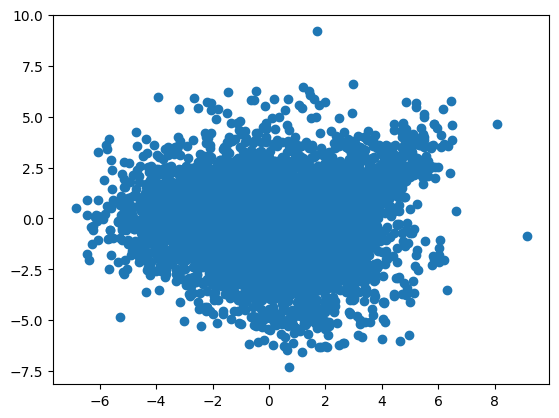

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = w2v.wv.vectors

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure()
plt.scatter(X_pca[:,0],X_pca[:,1])
plt.show()

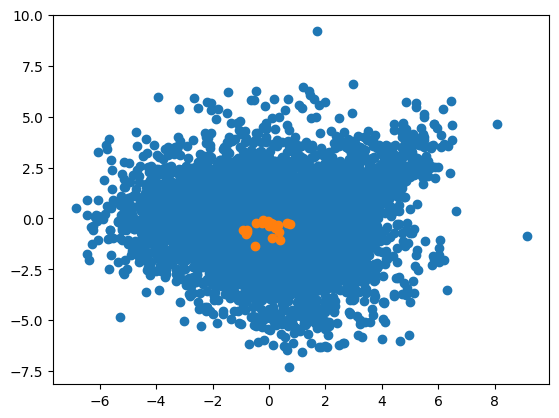

In [ ]:
vecinos = w2v.wv.most_similar('dvd',topn=20)

vecinos_emb = []
for w in vecinos:
    vecinos_emb.append(w2v.wv.get_vector(w[0]))
vecinos_emb = np.array(vecinos_emb)

plt.figure()
plt.scatter(X_pca[:,0],X_pca[:,1])
plt.scatter(vecinos_emb[:,0],vecinos_emb[:,1])
plt.show()

## Clasificación (Análisis de Sentimientos)

En esta parte de la notebook resolveremos el problema de clasificación del dataset IMDB. Usaremos tres tipos de redes basadas en los embeddings que hemos obtenido.

In [ ]:
from sklearn.preprocessing import LabelEncoder

labels = df['sentiment'].values
encoder = LabelEncoder()
y = encoder.fit_transform(labels)

### MLP

Podemos representar cada review por medio del promedio de las representaciones vectoriales de las palabras que lo componen. De esta forma, cada review tendrá una representación vectorial, la cual puede entrar a una red *fully connected*.

Preparamos la matriz de representaciones vectoriales de los reviews. Dado que son 50,000 reviews, este proceso es largo. Lo leeremos desde un archivo previamente calculado.

In [ ]:
#@title Lo cargamos desde Drive
!gdown 1KS256xsU6UALxBuebcnGkW3vW04s2Kn5

Downloading...
From: https://drive.google.com/uc?id=1KS256xsU6UALxBuebcnGkW3vW04s2Kn5
To: /content/IMDB-w2v-promedio-150.npy
100% 60.0M/60.0M [00:00<00:00, 67.9MB/s]


In [ ]:
import numpy as np

X_reviews = np.load("/content/IMDB-w2v-promedio-150.npy")

También podríamos calcularlos *desde cero*. Tarda alrededor de 10 minutos.

In [ ]:
X_reviews = np.zeros((df.shape[0],embedding_dim))

for j,x in enumerate(tokens):
    X_r = np.array([w2v.wv[word] for word in x if word in vocab])
    X_r = np.mean(X_r,axis=0)
    X_reviews[j,:] = X_r

X_reviews[:5,:7]

In [ ]:
np.save("IMDB-w2v-promedio-150.npy",X_reviews)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reviews, y, random_state=64, train_size=0.8)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (40000, 150)
Shape of X_test: (10000, 150)


Definimos el modelo

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(32,input_shape=(embedding_dim,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                4832      
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 7,009
Trainable params: 7,009
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping

es = EarlyStopping()

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.1,epochs=30,
                    callbacks=[es])

Epoch 1/30
1125/1125 [==============================] - 6s 5ms/step - loss: 0.3274 - accuracy: 0.8589 - val_loss: 0.3248 - val_accuracy: 0.8683
Epoch 2/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.3202 - accuracy: 0.8613 - val_loss: 0.3230 - val_accuracy: 0.8720
Epoch 3/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.3162 - accuracy: 0.8647 - val_loss: 0.3199 - val_accuracy: 0.8720
Epoch 4/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.3118 - accuracy: 0.8659 - val_loss: 0.3181 - val_accuracy: 0.8708
Epoch 5/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.3091 - accuracy: 0.8681 - val_loss: 0.3179 - val_accuracy: 0.8717
Epoch 6/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.3065 - accuracy: 0.8675 - val_loss: 0.3193 - val_accuracy: 0.8733


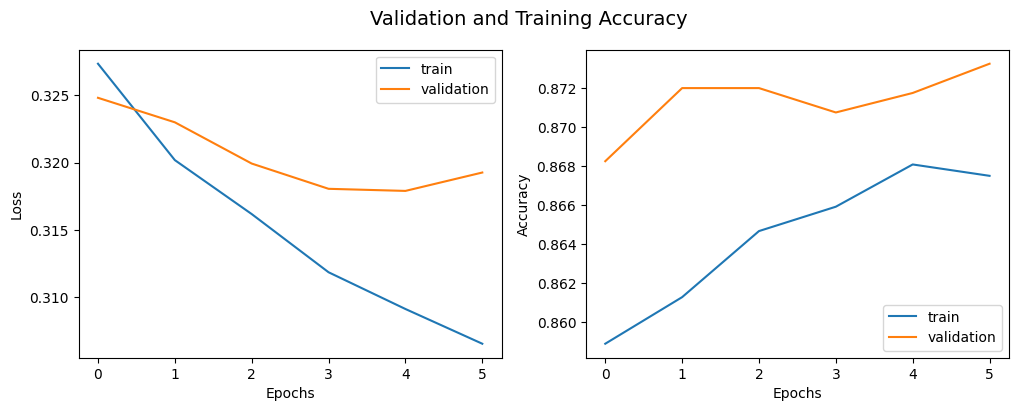

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4),dpi=100)
plt.suptitle("Training Curves",fontsize=16)
plt.subplot(1, 2, 1)
plt.suptitle("Validation and Training Loss",fontsize=14)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.subplot(1, 2, 2)
plt.suptitle("Validation and Training Accuracy",fontsize=14)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

predictions = model.predict(X_test)

pred_labels = []

for x in predictions:
    if x >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)

test_accuracy = accuracy_score(y_test,pred_labels)
test_recall = recall_score(y_test,pred_labels)
print(f"Test Accuracy: {round(test_accuracy,3)}")
print(f"Test Recall: {round(test_recall,3)}")

print("\nConfusion Matrix:\n",confusion_matrix(y_test,pred_labels))

313/313 [==============================] - 1s 2ms/step
Test Accuracy: 0.862
Test Recall: 0.854

Confusion Matrix:
 [[4306  645]
 [ 735 4314]]


### CNN

In [ ]:
from sklearn.preprocessing import LabelEncoder

labels = df['sentiment'].values
encoder = LabelEncoder()
y = encoder.fit_transform(labels)

In [ ]:
vocab = list(keyed_vectors.key_to_index)

Ahora, representemos cada review por un número fijo de embeddings de las palabras que lo componen. De esta manera, cada review estará representado por una matriz.

⭕ ¿Qué estrategia podríamos usar para escoger cuales palabras representarán al review?

Dado que tenemos muchos documentos y construiremos un tensor, sólo nos quedaremos con una muestra de los documentos para poder manejar los datos en un tiempo razonable.

In [ ]:
tokens = df['clean'].values

sample_idxs = np.random.choice(df.shape[0],size=10000,replace=False)

sample_tokens = [tokens[j] for j in sample_idxs]
sample_y = y[sample_idxs]

In [ ]:
width = 6

X_tensor_reviews = np.zeros((len(sample_tokens),embedding_dim,width))

for j,x in enumerate(sample_tokens):
    available_words = [w for w in x if w in vocab]
    X_r = np.array([w2v.wv.get_vector(word) for word in available_words])
    X_r = np.transpose(X_r)
    size = X_r.shape[0]
    if size>=width:
        X_tensor_reviews[j,:,:] = X_r[:,:width]
    else:
        X_tensor_reviews[j,:,:size] = X_r

In [ ]:
X_tensor_reviews.shape

Guardamos el tensor

In [ ]:
# np.save("/content/IMDB-w2v-tensor-150-5.npy",X_tensor_reviews)

Leemos el tensor

In [ ]:
!gdown 1px17yZbmr4HW0jrDBEYwKFLzAfwpd2-F

Downloading...
From: https://drive.google.com/uc?id=1px17yZbmr4HW0jrDBEYwKFLzAfwpd2-F
To: /content/IMDB-w2v-tensor-150-5.npy
100% 60.0M/60.0M [00:00<00:00, 126MB/s]


In [ ]:
X_tensor_reviews = np.load("/content/IMDB-w2v-tensor-150-5.npy")

Revisamos que las dimensiones sean correctas

In [ ]:
print(X_tensor_reviews.shape)
print(sample_y.shape)

(10000, 150, 5)
(10000,)


Dividimos en entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tensor_reviews, sample_y, random_state=64, train_size=0.8)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (8000, 150, 5)
Shape of X_test: (2000, 150, 5)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

m, n = X_train.shape[1], X_train.shape[2]

In [ ]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (8000, 150, 5, 1)
Shape of X_test: (2000, 150, 5, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
model.add(Conv2D(10, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(m,n,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(25, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 3, 10)        100       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 1, 10)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 740)               0         
                                                                 
 dense_10 (Dense)            (None, 50)                37050     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 25)                1275      
                                                      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',patience=3)

history = model.fit(X_train, y_train, batch_size=32, epochs=25, validation_split=0.1,
            callbacks=[es])

Epoch 1/25
225/225 [==============================] - 3s 4ms/step - loss: 0.6990 - accuracy: 0.5054 - val_loss: 0.6938 - val_accuracy: 0.5013
Epoch 2/25
225/225 [==============================] - 1s 4ms/step - loss: 0.6943 - accuracy: 0.5115 - val_loss: 0.6928 - val_accuracy: 0.5138
Epoch 3/25
225/225 [==============================] - 1s 4ms/step - loss: 0.6939 - accuracy: 0.5144 - val_loss: 0.6980 - val_accuracy: 0.4913
Epoch 4/25
225/225 [==============================] - 1s 4ms/step - loss: 0.6926 - accuracy: 0.5197 - val_loss: 0.6936 - val_accuracy: 0.5100
Epoch 5/25
225/225 [==============================] - 1s 4ms/step - loss: 0.6912 - accuracy: 0.5250 - val_loss: 0.6945 - val_accuracy: 0.5125


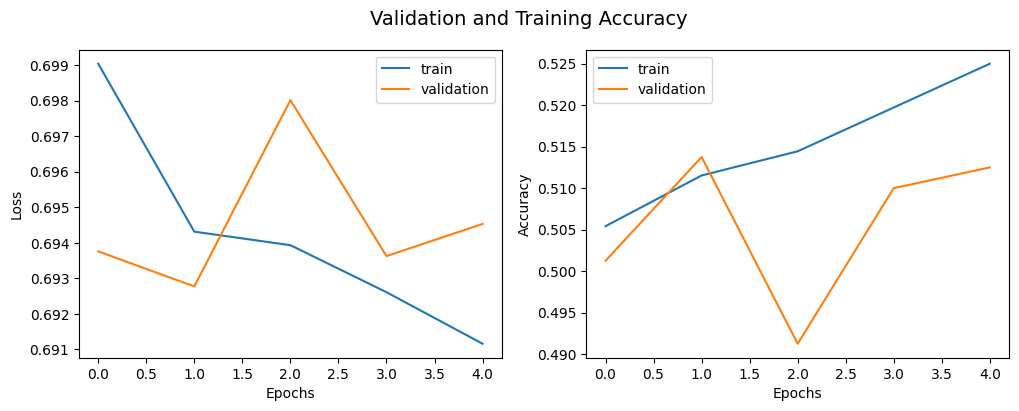

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4),dpi=100)
plt.suptitle("Training Curves",fontsize=16)
plt.subplot(1, 2, 1)
plt.suptitle("Validation and Training Loss",fontsize=14)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.subplot(1, 2, 2)
plt.suptitle("Validation and Training Accuracy",fontsize=14)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

predictions = model.predict(X_test)

pred_labels = []

for x in predictions:
    if x >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)

test_accuracy = accuracy_score(y_test,pred_labels)
test_recall = recall_score(y_test,pred_labels)
print(f"Test Accuracy: {round(test_accuracy,3)}")
print(f"Test Recall: {round(test_recall,3)}")

print("\nConfusion Matrix:\n",confusion_matrix(y_test,pred_labels))

63/63 [==============================] - 0s 2ms/step
Test Accuracy: 0.492
Test Recall: 0.332

Confusion Matrix:
 [[646 336]
 [680 338]]


### LSTM

Ahora, realizaremos la clasificación usando una red con una capa LSTM. Repetiremos la estrategia de la sesión pasada, pero ahora incorporaremos los embeddings que acabamos de calcular

Obtenemos los conjuntos $X$ y $y$

In [ ]:
from sklearn.preprocessing import LabelEncoder

labels = df['sentiment'].values
encoder = LabelEncoder()
y = encoder.fit_transform(labels)

In [ ]:
from sklearn.model_selection import train_test_split

reviews = df['clean'].values

train_reviews, test_reviews, y_train, y_test = train_test_split(reviews, y, train_size=0.8, random_state=74)

print(f"Shape of X_train: {train_reviews.shape}")
print(f"Shape of X_test: {test_reviews.shape}")

Shape of X_train: (40000,)
Shape of X_test: (10000,)


Tokenizamos los documentos para obtener las secuencias de índices

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ----- Hiperparámetros para este preprocesamiento
vocab_size = 3000   # Nos limitaremos a ese número de palabras del vocabulario
oov_tok = ''        # Las palabras fuera del vocabulario se reemplazarán con este string
max_length = 200    # La longitud común deseada para las secuencias al hacer el padding

#  ----- Entrenamos el tokenizador
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_reviews)

#  ----- Creamos las secuencias de entrenamiento y hacemos el padding
train_sequences = tokenizer.texts_to_sequences(train_reviews)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)

#  ----- Creamos las secuencias de prueba y hacemos el padding
test_sequences = tokenizer.texts_to_sequences(test_reviews)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

Preparamos la capa Embedding, ahora en lugar de generar embeddings, sólo los recuperará de nuestro embeddings entrenados

In [ ]:
from keras.layers import Embedding

vocab_len = len(vocab)

embedding_matrix = np.zeros((vocab_len, embedding_dim))

for word, index in tokenizer.word_index.items():
    try:
        embedding_vector = w2v.wv.get_vector(word)
        if embedding_vector is not None:
            embedding_matrix[index, :] = embedding_vector
    except:
        pass

embedding_layer = Embedding(input_dim=vocab_len, output_dim=embedding_dim, input_length=max_length,
                            weights = [embedding_matrix], trainable=False)

Si no usaramos los embeddings de palabras, definiríamos la capa `Embedding` así:

In [ ]:
# embedding_layer = Embedding(input_dim=vocab_len,
#                             output_dim=embedding_dim,
#                             input_length=max_length,
#                             trainable=False)

Esta capa de embeddings se incorpora a la arquitectura de la red

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# ----- model initialization
model = Sequential([
    embedding_layer,
    LSTM(55, dropout=0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# ----- compile model
model.compile(loss='binary_crossentropy',
              optimizer='RMSProp',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 150)          8004450   
                                                                 
 lstm_6 (LSTM)               (None, 55)                45320     
                                                                 
 dense_17 (Dense)            (None, 32)                1792      
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 8,052,107
Trainable params: 47,657
Non-trainable params: 8,004,450
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

r_lr = ReduceLROnPlateau()
es = EarlyStopping(monitor='val_loss',patience=3)

num_epochs = 25

history = model.fit(train_padded, y_train,
                    epochs=num_epochs, verbose=1,
                    validation_split=0.1,
                    callbacks=[es,r_lr])

Epoch 1/25
1125/1125 [==============================] - 14s 11ms/step - loss: 0.5483 - accuracy: 0.7405 - val_loss: 0.5019 - val_accuracy: 0.7912 - lr: 0.0010
Epoch 2/25
1125/1125 [==============================] - 11s 10ms/step - loss: 0.4716 - accuracy: 0.8127 - val_loss: 0.5713 - val_accuracy: 0.7345 - lr: 0.0010
Epoch 3/25
1125/1125 [==============================] - 11s 10ms/step - loss: 0.4452 - accuracy: 0.8134 - val_loss: 0.4222 - val_accuracy: 0.8332 - lr: 0.0010
Epoch 4/25
1125/1125 [==============================] - 12s 10ms/step - loss: 0.4267 - accuracy: 0.8323 - val_loss: 0.3892 - val_accuracy: 0.8328 - lr: 0.0010
Epoch 5/25
1125/1125 [==============================] - 11s 10ms/step - loss: 0.4189 - accuracy: 0.8320 - val_loss: 0.3748 - val_accuracy: 0.8453 - lr: 0.0010
Epoch 6/25
1125/1125 [==============================] - 11s 10ms/step - loss: 0.3985 - accuracy: 0.8381 - val_loss: 0.4291 - val_accuracy: 0.8177 - lr: 0.0010
Epoch 7/25
1125/1125 [========================

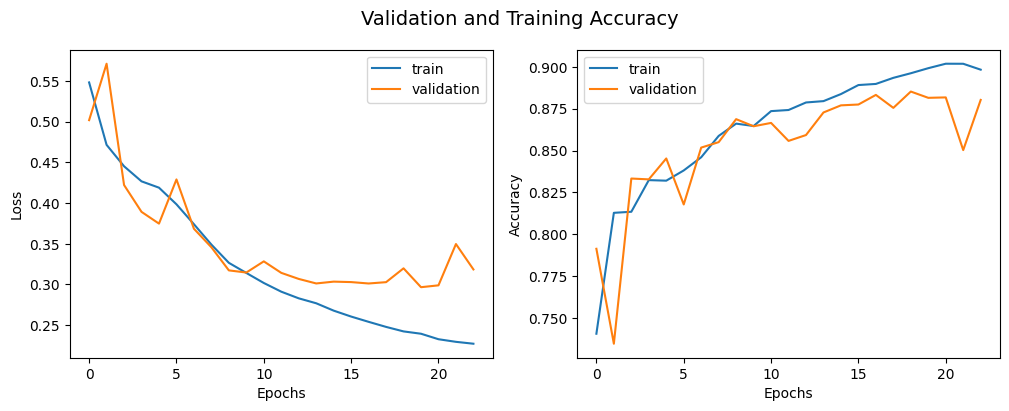

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4),dpi=100)
plt.suptitle("Training Curves",fontsize=16)
plt.subplot(1, 2, 1)
plt.suptitle("Validation and Training Loss",fontsize=14)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.subplot(1, 2, 2)
plt.suptitle("Validation and Training Accuracy",fontsize=14)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

predictions = model.predict(test_padded)

pred_labels = []

for x in predictions:
    if x >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)

test_accuracy = accuracy_score(y_test,pred_labels)
test_recall = recall_score(y_test,pred_labels)
print(f"Test Accuracy: {round(test_accuracy,3)}")
print(f"Test Recall: {round(test_recall,3)}")

print("\nConfusion Matrix:\n",confusion_matrix(y_test,pred_labels))

313/313 [==============================] - 1s 4ms/step
Test Accuracy: 0.87
Test Recall: 0.828

Confusion Matrix:
 [[4580  437]
 [ 858 4125]]


### ⭕ MLP - doc2vec


In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tokens = df['clean'].values

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(tokens)]

embedding_dim = 150

model = Doc2Vec(documents, vector_size=embedding_dim, window=2, min_count=1, workers=4)

In [ ]:
model.save('doc2vec-imbd-150.model')

Con `doc2vec` podemos generar vector para nuevos documentos.

In [ ]:
vector = model.infer_vector(['i', 'liked', 'the', 'new', 'movie'])
print(vector)

In [ ]:
dv = model.dv

Podemos acceder a los vector usando el índice del documento en el dataframe.

In [ ]:
df.shape

(50000, 3)

In [ ]:
dv[57].shape

(150,)

In [ ]:
import numpy as np

doc_embeddings = np.zeros(shape=(df.shape[0],embedding_dim))

for k in df.index.to_list():
    doc_embeddings[k,:] = dv[k]

print(doc_embeddings.shape)
doc_embeddings[:3,:5]

⭕ Ejercicio

Definir y entrenar una red MLP para la tarea de clasificación usando los vector de doc2vec como features de cada documento. Es decir, el conjunto X es el arreglo `doc_embeddings`.

¿Puedes obtener mejores métricas que las que obtuvimos con las otras estrategias?

# Topic Detection

In [ ]:
!pip install -qq wordcloud

In [ ]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/03%20Machine%20Learning/data/spanish-wikipedia-dataframe.csv"
df = pd.read_csv(url,index_col=0)
df

,doc_id,Texto
0,646956,amaury iii señor montfort amaury conde évreux ...
1,646957,ruud janssen tilburg july artista holandés flu...
2,646958,grandes crónicas francia compilación obras his...
3,646961,san miguel basauri grupo barrios tomado barrio...
4,646963,río perené corto río perú constituye parte sup...
...,...,...
4018,665821,iese puede hacer referencia siguiente institut...
4019,665823,cygni abreviado cyg sistema estelar triple loc...
4020,665831,acrónimo ima puede referirse instituto mundo á...
4021,665833,eleonora cassano buenos aires enero bailarina ...


In [ ]:
df['Tokens'] = df['Texto'].apply(clean)
df

,doc_id,Texto,Tokens
0,646956,amaury iii señor montfort amaury conde évreux ...,"[amaury, iii, señor, montfort, amaury, conde, ..."
1,646957,ruud janssen tilburg july artista holandés flu...,"[ruud, janssen, tilburg, july, artista, holand..."
2,646958,grandes crónicas francia compilación obras his...,"[grandes, crónicas, francia, compilación, obra..."
3,646961,san miguel basauri grupo barrios tomado barrio...,"[san, miguel, basauri, grupo, barrio, tomado, ..."
4,646963,río perené corto río perú constituye parte sup...,"[río, perené, corto, río, perú, constituye, pa..."
...,...,...,...
4018,665821,iese puede hacer referencia siguiente institut...,"[iese, puede, hacer, referencia, siguiente, in..."
4019,665823,cygni abreviado cyg sistema estelar triple loc...,"[cygni, abreviado, cyg, sistema, estelar, trip..."
4020,665831,acrónimo ima puede referirse instituto mundo á...,"[acrónimo, ima, puede, referirse, instituto, m..."
4021,665833,eleonora cassano buenos aires enero bailarina ...,"[eleonora, cassano, buenos, aire, enero, baila..."


## Embeddings

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tokens = df['Tokens'].values

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(tokens)]

embedding_dim = 250 # 50

model = Doc2Vec(documents, vector_size=embedding_dim, window=2, min_count=1, workers=4)


In [ ]:
import numpy as np

dv = model.dv

doc_embeddings = np.zeros(shape=(df.shape[0],embedding_dim))
for k in df.index.to_list():
    doc_embeddings[k,:] = dv[k]

print(doc_embeddings.shape)
doc_embeddings[:3,:5]



(4023, 250)


array([[ 0.26736599, -0.11145073,  0.21571445,  0.53964925, -0.2146405 ],
       [ 0.32858998, -0.0817261 ,  0.36901036,  0.44293383, -0.18156594],
       [ 0.25120679, -0.06147278,  0.28297144,  0.49645352, -0.23741935]])

## Segmentación en tópicos - Clustering

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 5

clustering = KMeans(n_clusters=num_clusters)
clustering.fit(doc_embeddings)
clusters = clustering.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


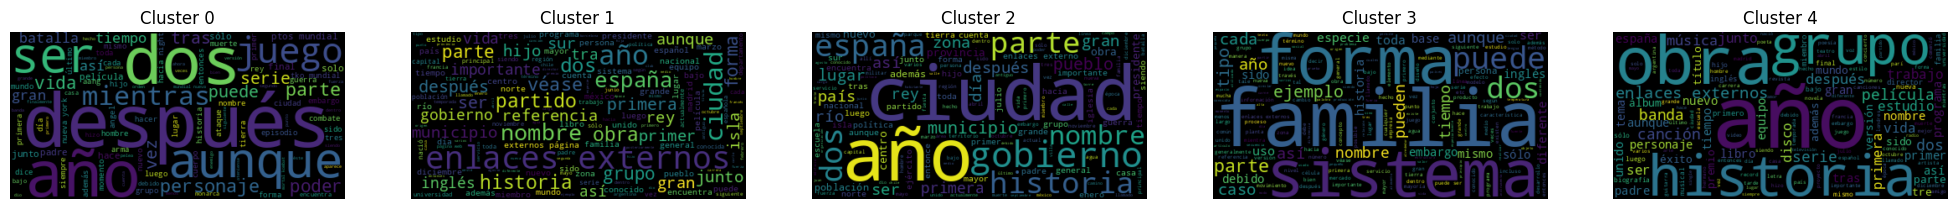

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

idxs_per_cluster = {j:np.where(clusters==j)[0] for j in np.unique(clusters)}
documents_per_cluster = {j:df.loc[idxs_per_cluster[j],'Texto'].values for j in np.unique(clusters)}

fig, axs = plt.subplots(nrows=1,ncols=num_clusters,figsize=(5*num_clusters,5),dpi=100)
for k,ax in enumerate(axs):
    wordcloud = WordCloud().generate(" ".join(documents_per_cluster[k]))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(f"Cluster {k}")
fig.show()

In [ ]:
from sklearn.metrics import silhouette_score

print(f"Score de silueta: {silhouette_score(doc_embeddings,clusters)}")

Score de silueta: 0.30394138389073766


## Documentos similares

In [ ]:
df['Embedding'] = [doc_embeddings[j,:] for j in df.index.to_list()]
df

,doc_id,Texto,Tokens,Embedding
0,646956,amaury iii señor montfort amaury conde évreux ...,"[amaury, iii, señor, montfort, amaury, conde, ...","[0.2673659920692444, -0.11145073175430298, 0.2..."
1,646957,ruud janssen tilburg july artista holandés flu...,"[ruud, janssen, tilburg, july, artista, holand...","[0.3285899758338928, -0.08172610402107239, 0.3..."
2,646958,grandes crónicas francia compilación obras his...,"[grandes, crónicas, francia, compilación, obra...","[0.25120678544044495, -0.06147278472781181, 0...."
3,646961,san miguel basauri grupo barrios tomado barrio...,"[san, miguel, basauri, grupo, barrio, tomado, ...","[0.26688769459724426, -0.11550077050924301, 0...."
4,646963,río perené corto río perú constituye parte sup...,"[río, perené, corto, río, perú, constituye, pa...","[0.1850258857011795, -0.2572510838508606, 0.13..."
...,...,...,...,...
4018,665821,iese puede hacer referencia siguiente institut...,"[iese, puede, hacer, referencia, siguiente, in...","[0.05310595780611038, 0.021385155618190765, 0...."
4019,665823,cygni abreviado cyg sistema estelar triple loc...,"[cygni, abreviado, cyg, sistema, estelar, trip...","[0.07216283679008484, -0.3548341393470764, 0.3..."
4020,665831,acrónimo ima puede referirse instituto mundo á...,"[acrónimo, ima, puede, referirse, instituto, m...","[0.025551320984959602, -0.038396164774894714, ..."
4021,665833,eleonora cassano buenos aires enero bailarina ...,"[eleonora, cassano, buenos, aire, enero, baila...","[0.2660592794418335, -0.03617711365222931, 0.2..."


In [ ]:
import numpy as np

idxs_to_check = list(np.random.choice(df.index.to_list(),size=5,replace=False))

print(idxs_to_check)

[1606, 4019, 3921, 3275, 795]


In [ ]:
most_similar_idxs = model.dv.most_similar(idxs_to_check[0],topn=3)

In [ ]:
most_similar_docs = {x:model.dv.most_similar(x,topn=3) for x in idxs_to_check}
most_similar_docs

{1606: [(1203, 0.9801040291786194),
  (1827, 0.9777632355690002),
  (3177, 0.9749537110328674)],
 4019: [(114, 0.984741747379303),
  (1947, 0.9841281175613403),
  (3095, 0.983803391456604)],
 3921: [(727, 0.99454665184021),
  (3321, 0.9943290948867798),
  (2399, 0.9942767024040222)],
 3275: [(1339, 0.983173668384552),
  (3625, 0.9815462231636047),
  (141, 0.9749621152877808)],
 795: [(3428, 0.9671382904052734),
  (699, 0.9644859433174133),
  (3184, 0.9644059538841248)]}

In [ ]:
for k,v in most_similar_docs.items():
    print(f"Referencia:\n{df.loc[k,'Texto']}")
    for idx,sim in v:
        print(f"\tSimilar ({round(sim,3)}):\n\t{df.loc[idx,'Texto']}")

Referencia:
regla sacacorchos permite determinar dirección espacio relación dos dirección giro dirección espacio así hace girar sacacorchos tornillo hacia derecha agujas reloj sacacorchos tornillo avanza puede utilizar sacacorchos tornillo hace girar sacacorchos tornillo hacia izquierda contrario agujas reloj sacacorchos tornillo retroceden utiliza general todas definiciones descripciones basadas producto vectorial ejemplo producto vectorial producto sacacorchos gira hacia llevando punta hacia punta rotación menor media vuelta radianes sacacorchos avanza retrocede dirección momento fuerzas torque vector asociado velocidad angular sacacorchos gira objeto dirección avance sacacorchos dirección vector asociado velocidad angular vector asociado momento angular dirección campo magnético producido corriente sacacorchos avanza dirección corriente gira dirección campo magnético dirección corriente produce campo magnético fuerza ejercida campo magnético carga eléctrica movimiento fuerza ejercid

## Using [topic2vec](https://pypi.org/project/top2vec/) *encima* de Doc2Vec

In [ ]:
!pip install -qq top2vec

In [ ]:
from top2vec import Top2Vec

documents = df['Texto'].values

model_t2v = Top2Vec(documents,embedding_model='doc2vec')

2024-06-26 17:37:18,672 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2024-06-26 17:37:27,492 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-06-26 17:40:12,187 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-06-26 17:40:51,123 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-06-26 17:40:51,246 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
model_t2v.get_num_topics()

48

In [ ]:
# import os
import ipywidgets as widgets
from IPython.display import clear_output, display

In [ ]:
topic_num_select = widgets.Label('Select topic number: ')
display(topic_num_select)

topic_input = widgets.Text()
display(topic_input)

doc_num_select = widgets.Label('Choose number of documents: ')
display(doc_num_select)

doc_num_input = widgets.Text(value='10')
display(doc_num_input)

def display_topics(*args):

    clear_output()
    display(topic_num_select)
    display(topic_input)
    display(doc_num_select)
    display(doc_num_input)
    display(topic_btn)

    documents, document_scores, document_nums = model_t2v.search_documents_by_topic(topic_num=int(topic_input.value), num_docs=int(doc_num_input.value))

    result_df = df.loc[document_nums]
    result_df["document_scores"] = document_scores

    for index,row in result_df.iterrows():
        print(f"Document: {index}, Score: {row.document_scores}")
        print("-----------")
        print(row['Texto'])
        print("-----------")
        print()

topic_btn = widgets.Button(description="show documents")
display(topic_btn)
topic_btn.on_click(display_topics)

Label(value='Select topic number: ')

Text(value='4')

Label(value='Choose number of documents: ')

Text(value='5')

Button(description='show documents', style=ButtonStyle())

Document: 1836, Score: 0.7409793734550476
-----------
walter pattison hispanista estadounidense doctoró tesis trovadores publicó fragmentos artículos concentró embargo atención literatura siglo xix publicó benito pérez galdós and the creative process univ minnesota press estudio esproncedas personality compuso antología literatura española representative spanish authors oxford university press
-----------

Document: 2788, Score: 0.7256994843482971
-----------
william collins chichester diciembre chichester junio poeta inglés poetas cementerio nacido chichester west sussex estudió winchester college universidad oxford trasladó londres cuarenta siglo xviii vivió próximo miseria perdida razón últimos años pasó chichester murió manicomio influencia sólo superada thomas gray importante poeta mediados siglo xviii odas líricas marcaron distanciamiento respecto poesía generación alexander pope apuntaban romántica seguiría ello considerado precursor romanticismo poesías recibieron aplauso públi